# Text Cleaning

An excercise explore different techniques for data cleaning and feature exploration.

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import re    # for regular expressions
import numpy as np 
import pickle
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
print(len(stop_words))

179


In [0]:
# adding few more according to given domain
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 
                   'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Suppose we want to add more stopwords. To keep track of how many we added in round 1 and how many in round 2. It's better to use .extend or.union.
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [9]:
# for spacy module
! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.2.0/en_core_web_md-2.2.0.tar.gz

     |████████████████████████████████| 96.4MB 109kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.0-cp36-none-any.whl size=98072933 sha256=bedbff33617390a489e339bca0a44226491de0c3a97113029e8f0c3532bff83a
  Stored in directory: /root/.cache/pip/wheels/5f/3e/c9/36dd6e13b449fd84cd1f94b72dfbc559daf09f53dbf4e697a3
Successfully built en-core-web-md


In [0]:
# more text related modules
import spacy 
import en_core_web_md
nlp = en_core_web_md.load()

I personally like Spacy more than nltk. But, I never take sides so, I ll use both where they come handy

In [11]:
! pip install version_information

  Created wheel for version-information: filename=version_information-1.0.3-cp36-none-any.whl size=3880 sha256=d86de0ce36009f241d661ca89861ce30f45da874aab50a143fd84c23abd90829
  Stored in directory: /root/.cache/pip/wheels/1f/4c/b3/1976ac11dbd802723b564de1acaa453a72c36c95827e576321
Successfully built version-information


In [12]:
%reload_ext version_information
%version_information pandas,numpy, nltk, seaborn, matplotlib, re, PyPDF2,gensim, spacy

Software,Version
Python,3.6.9 64bit [GCC 8.3.0]
IPython,5.5.0
OS,Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas,0.25.3
numpy,1.17.4
nltk,3.2.5
seaborn,0.9.0
matplotlib,3.1.2
re,2.2.1
PyPDF2,The 'PyPDF2' distribution was not found and is required by the application


# 2)- Loading Dataset

from kaggle : https://www.kaggle.com/benhamner/nips-papers/data

In [13]:
! pip install kaggle

In [15]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassansherwani","key":"a1ac088054bfd5d79730da00710c5b13"}'}

In [0]:
#Kaggle API client
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

# This permission change avoids a warning on kaggle tool startup.

! chmod 600 ~/.kaggle/kaggle.json

In [17]:
# import data from kaggle API

! kaggle datasets download -d benhamner/nips-papers

 86% 121M/141M [00:04<00:01, 16.9MB/s]
100% 141M/141M [00:04<00:00, 33.5MB/s]


In [18]:
!unzip nips-papers.zip

Archive:  nips-papers.zip
  inflating: authors.csv             
  inflating: database.sqlite         
  inflating: paper_authors.csv       
  inflating: papers.csv              


In [19]:
data=pd.read_csv('papers.csv')
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [20]:
data.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
id            7241 non-null int64
year          7241 non-null int64
title         7241 non-null object
event_type    2422 non-null object
pdf_name      7241 non-null object
abstract      7241 non-null object
paper_text    7241 non-null object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [22]:
data.shape

(7241, 7)

In [0]:
# we shall create a smaller dataset with our features of interest

dataset= data[['id','year','title','abstract','paper_text']]

In [24]:
dataset.shape

(7241, 5)

In [25]:
dataset.head()

,id,year,title,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [26]:
dataset.tail()

,id,year,title,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


# 3)- Basic feature extraction
- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words
- most common and uncommon words 

In [0]:
# 1st create another short dataset only for paper_text for text exploring
df_ft=dataset[['id','paper_text']]

In [28]:
df_ft.head()

,id,paper_text
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross\nValidation, a..."


### 3.1)- Number of words

In [29]:
df_ft['word_count'] = df_ft['paper_text'].apply(lambda x: len(str(x).split(" ")))
df_ft.head()

,id,paper_text,word_count
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727
3,1000,Bayesian Query Construction for Neural\nNetwor...,2923
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",3009


In [30]:
df_ft.word_count.describe()

count     7241.000000
mean      4259.252037
std       1237.864868
min          1.000000
25%       3211.000000
50%       4473.000000
75%       5194.000000
max      11519.000000
Name: word_count, dtype: float64

**Some insight from above:**

- Average word count in our text document is 4259 words per document.
- The word count ranges from a minimum of 1 word to maximum of 11519 words. 
- This is useful information in a sense that it indicates size of dataset and also variation in word count across the rows

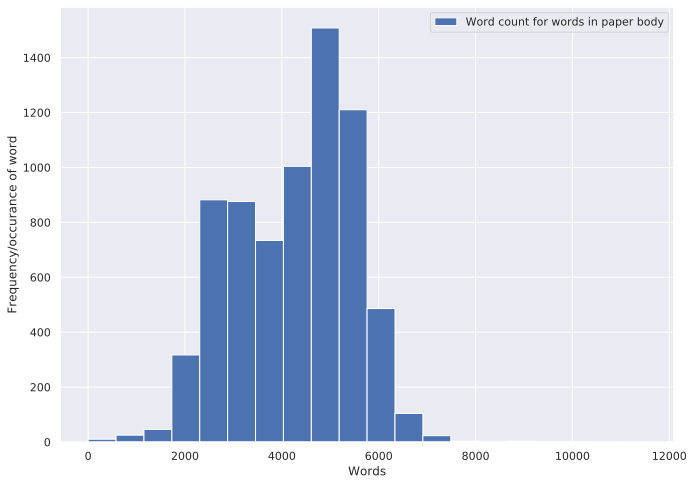

In [31]:
length_word = df_ft['word_count'] 
plt.hist(length_word, bins=20, label="Word count for words in paper body") 
plt.xlabel('Words')
plt.ylabel('Frequency/occurance of word')
plt.legend() 
plt.show()

### 3.2)- Number of characters

In [93]:
df_ft['char_count'] = df_ft['paper_text'].str.len() ## this also includes spaces
df_ft[['paper_text','char_count']].head()

,paper_text,char_count
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,21643
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,15505
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,20523
3,Bayesian Query Construction for Neural\nNetwor...,19441
4,"Neural Network Ensembles, Cross\nValidation, a...",20219


Notice how much difference we have in no. of charcters vs words 

In [33]:
df_ft.head()

,id,paper_text,word_count
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727
3,1000,Bayesian Query Construction for Neural\nNetwor...,2923
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",3009


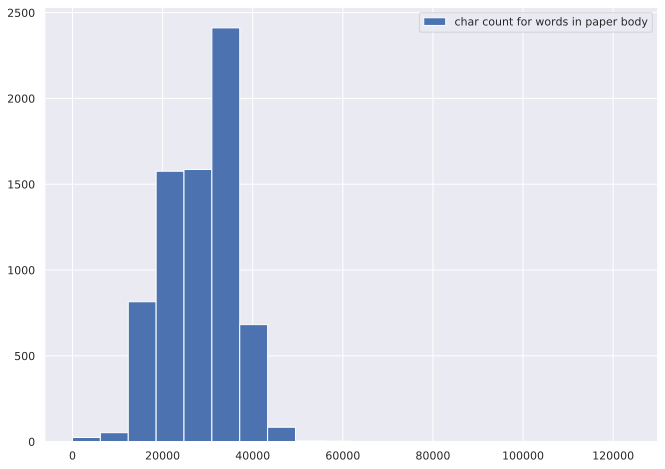

In [34]:
length_char = df_ft['paper_text'].str.len() 
plt.hist(length_char, bins=20, label="char count for words in paper body") 
plt.legend() 
plt.show()

### 3.3)-Average word length

Take the sum of the length of all the words and divide it by the total length of the text

In [0]:
sentence=df_ft['paper_text'][1]

In [36]:
print(len(sentence))

15505


In [0]:
words = sentence.split()

In [38]:
print(len(words))

2615


In [0]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [0]:
#df_ft['avg_len'] = df_ft['paper_text'].apply(lambda x: avg_word(x))
#df_ft.head(10)

### 3.4)-Number of stopwords

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_ft['stopwords'] = df_ft['paper_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_ft[['paper_text','stopwords']].head()

,paper_text,stopwords
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1188
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,936
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,833
3,Bayesian Query Construction for Neural\nNetwor...,862
4,"Neural Network Ensembles, Cross\nValidation, a...",1272


In [43]:
df_ft.head()

,id,paper_text,word_count,stopwords
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315,1188
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233,936
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727,833
3,1000,Bayesian Query Construction for Neural\nNetwor...,2923,862
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",3009,1272


### 3.5)-Number of special characters

- We use @, # symbols in social media
- A dagger, obelisk, or obelus is used in paper though rare.Let's see if we could find any.
- We shall use "?" as most research questions use it. But using it in start is a mistake or noise.

In [44]:
df_ft['special-words'] = df_ft['paper_text'].apply(lambda x: len([x for x in x.split() if x.startswith('?')]))
df_ft[['paper_text','special-words']].head()

,paper_text,special-words
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,15
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,4
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,12
3,Bayesian Query Construction for Neural\nNetwor...,4
4,"Neural Network Ensembles, Cross\nValidation, a...",6


### 3.6)- Number of numerics

In [45]:
df_ft['numerics'] = df_ft['paper_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_ft[['paper_text','numerics']].head()

,paper_text,numerics
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,59
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,23
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,49
3,Bayesian Query Construction for Neural\nNetwor...,55
4,"Neural Network Ensembles, Cross\nValidation, a...",50


In [46]:
df_ft[['paper_text','numerics']].tail()

,paper_text,numerics
7236,Single Transistor Learning Synapses\n\nPaul Ha...,68
7237,"Bias, Variance and the Combination of\nLeast S...",37
7238,A Real Time Clustering CMOS\nNeural Engine\nT....,87
7239,Learning direction in global motion: two\nclas...,30
7240,Correlation and Interpolation Networks for\nRe...,27


### 3.7)-Number of uppercase words

In [0]:
df_ft['upper'] = df_ft['paper_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [48]:
df_ft[['paper_text','upper']].head()

,paper_text,upper
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,181
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,164
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,268
3,Bayesian Query Construction for Neural\nNetwor...,173
4,"Neural Network Ensembles, Cross\nValidation, a...",86


### 3.8)- Most common and 

A peek into the most common words gives insights not only on the frequently used words but also words that could also be potential data specific stop words. A comparison of the most common words and the default English stop words will give us a list of words that need to be added to a custom stop word list.

In [49]:
#Identify top 20 most common/frequently occuring words
common = pd.Series(' '.join(dataset['paper_text']).split()).value_counts()[:20]
common

the     1741341
of       992459
and      737835
?        643837
a        585149
to       565402
is       496162
in       472178
for      350809
that     291198
=        282147
,        226448
we       226390
with     223759
The      208088
on       193614
.        190768
by       184927
are      182535
as       181125
dtype: int64

Most of them are stop words and if we remove them then our data will be lighter. Also they are not contributing towards meaning of document so, removing them won't take away any useful information

### 3.9)-Uncommon words

In [50]:
#Identify top 20 uncommon words
uncommon=pd.Series(' '.join(dataset['paper_text']).split()).value_counts()[-20:]
uncommon

Gose,                               1
super-pixels),                      1
Squad:                              1
2so(t)                              1
multiway)                           1
)/DX                                1
Ku,t?1                              1
((IOgP(X)).;                        1
Pennachin.                          1
Aharonov-Barki                      1
Burles,                             1
a?{1,2},k?{1...d}                   1
DHem[p,]~~~IDOB[p,I]~~~IDOB[p,"]    1
Paralyzed.                          1
166Mhz                              1
kJw3T                               1
in-put                              1
m(f?,j                              1
ZYg                                 1
26(4):1314?1328,                    1
dtype: int64

Some of these words are non-sense strings and we can drop them as well and there won't be any change in meaning of document.

### Final dataset 

In [51]:
df_ft.head()

,id,paper_text,word_count,stopwords,special-words,numerics,upper
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315,1188,15,59,181
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233,936,4,23,164
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727,833,12,49,268
3,1000,Bayesian Query Construction for Neural\nNetwor...,2923,862,4,55,173
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",3009,1272,6,50,86


# 4)- Text Preprocessing and cleaning

- a)- Initial cleanup (remove unwanted patterns, symbols, special chars, punc.)
- b)- Normalization (Token+Lemma)
- c)- Final cleanup(removal of any longer chars, filters,stitch words back to make dataframe)

In [0]:
df_clean=dataset[['id','paper_text']]

In [53]:
df_clean.head()

,id,paper_text
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross\nValidation, a..."


### 4.a)- Initial Cleanup

- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent/common words removal
- Rare words removal
- Spelling correction

#### 4.a.1)-Lower case
First pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Father’ and ‘father’ will be taken as different words.

In [54]:
df_clean['clean'] = df_clean['paper_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,767 self-organization of associative database ...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,683 a mean field theory of layer iv of visual ...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,394 storing covariance by the associative long...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction for neural network...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...","neural network ensembles, cross validation, an..."


In [55]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
15393


#### 4.a.2)-Removing Punctuation
removing em will help us reduce the size

In [0]:
df_clean['clean'] = df_clean['clean'].str.replace('[^\w\s]','')

In [57]:
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,767 selforganization of associative database a...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,683 a mean field theory of layer iv of visual ...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,394 storing covariance by the associative long...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction for neural network...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation and ...


In [58]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
14718


This is not enough. We need to be more specific

In [0]:
# round 2 cleaning of puncuation and others
import string
import re

def clean_more(text):
    ''' remove text in square brackets, remove punctuation and remove words containing numbers if anyleft by now.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round_2 = lambda x: clean_more(x)

In [60]:
df_clean['clean'] = df_clean.clean.apply(round_2)
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization of associative database and ...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cor...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative longter...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction for neural network...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation and ...


some work has been done here. More to do !

In [61]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
14474


#### 4.a.3)-Removal of Stop Words

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [63]:
df_clean['clean'] = df_clean['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization associative database applicat...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer iv visual cortex appli...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative longterm potent...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation acti...


In [64]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
10341


#### 4.a.4)-Frequent word removal

As most of our common words were useless so, we better remove some

In [65]:
# checking common words again before vs after cleaning
common_before = pd.Series(' '.join(df_clean['paper_text']).split()).value_counts()[:20]
common_before

the     1741341
of       992459
and      737835
?        643837
a        585149
to       565402
is       496162
in       472178
for      350809
that     291198
=        282147
,        226448
we       226390
with     223759
The      208088
on       193614
.        190768
by       184927
are      182535
as       181125
dtype: int64

In [66]:
common_after = pd.Series(' '.join(df_clean['clean']).split()).value_counts()[:20]
common_after

x            164628
n            117765
k            110061
p            104178
learning     103935
model        102065
data          91601
j             88797
f             81966
algorithm     81765
b             77531
r             74434
c             73806
set           73553
function      68967
using         67955
one           57589
e             57341
w             53719
number        53435
dtype: int64

It depends on business problem. If we are working on text classification then these words may not effect our outcome. If we are working on keyword extraction (NER, Topic modeling) then we might need some of these frequent words. So, I will write code for how to and then we can use as per requirement.

In [67]:
common = list(common_after.index)
df_clean['clean2'] = df_clean['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
df_clean.head()

,id,paper_text,clean,clean2
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization associative database applicat...,selforganization associative database applicat...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer iv visual cortex appli...,mean field theory layer iv visual cortex appli...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative longterm potent...,storing covariance associative longterm potent...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...,bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation acti...,neural network ensembles cross validation acti...


In [68]:
common_after2 = pd.Series(' '.join(df_clean['clean2']).split()).value_counts()[:20]
common_after2

figure          53164
l               52510
problem         52058
two             51532
time            51378
v               51221
h               49230
models          48752
also            46769
results         46349
training        46114
given           45781
used            45523
g               45140
neural          44528
distribution    44468
network         43699
matrix          41793
z               41405
information     40165
dtype: int64

I personally think removing frequently occuring words is not very reliable here. However; giving a look to least occuring words could make more sense.

In [69]:
# removing clean2

df_clean= df_clean.drop(['clean2'], axis=1)
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization associative database applicat...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer iv visual cortex appli...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative longterm potent...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation acti...


#### 4.a.5)-Rare words removal
Let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise

In [70]:
uncommon_before = pd.Series(' '.join(df_clean['paper_text']).split()).value_counts()[-10:]
uncommon_before

Burles,                             1
a?{1,2},k?{1...d}                   1
DHem[p,]~~~IDOB[p,I]~~~IDOB[p,"]    1
Paralyzed.                          1
166Mhz                              1
kJw3T                               1
in-put                              1
m(f?,j                              1
ZYg                                 1
26(4):1314?1328,                    1
dtype: int64

In [71]:
uncommon_after = pd.Series(' '.join(df_clean['clean']).split()).value_counts()[-10:]
uncommon_after

indijl                                              1
hojt                                                1
densitymaron                                        1
firmlynonexpansive                                  1
rannte                                              1
pashkovski                                          1
singlee                                             1
rightear                                            1
browserlocalesenuschromebrowserbrowserproperties    1
gaua                                                1
dtype: int64

We can still remove these words as they do not make sense. And even if they had meaning, they were so less frequent then it wont make much difference to our model. 

In [72]:
less_freq = list(uncommon_after.index)
len(less_freq)

10

Notice, we will only remove 10 most least frequent words here. This could be useful for multiple attempts if we want to keep check on text data.

In [0]:
df_clean['clean'] = df_clean['clean'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq ))

In [74]:
less_freq = pd.Series(' '.join(df_clean['clean']).split()).value_counts()[-10:]
less_freq

brohan                1
jplane                1
goodbut               1
ljat                  1
prnamaa               1
lvqtqtdt              1
manifoldstructured    1
zhaxhecsepsuedu       1
nonfatiguing          1
winecocacola          1
dtype: int64

And we have more least occuring words and its better to remove them too. It is a careful process for not removing too many. We may use words occuring upto a filter value i.e <2 occuring words

In [75]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
10341


#### 4.a.6)-Spelling correction

This could create more problem at final step. It is recommended to use only and only if your customer is specific about it.

In [0]:
#from textblob import TextBlob
#df_clean['clean'][3].apply(lambda x: str(TextBlob(x).correct()))

## final cleaned dataset

In [77]:
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization associative database applicat...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer iv visual cortex appli...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative longterm potent...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation acti...


### 4.b)- Normalization

#### 4.b.1)-Tokenize

Spliting texts into separete words, also removing punctuanions and other stuff(doing again for triple check :)). After that procedure we should obtain texts as lists of words in lowercase:

In [78]:
tokenized_text = df_clean['clean'].apply(lambda x: x.split()) # tokenizing 
tokenized_text.head()

0    [selforganization, associative, database, appl...
1    [mean, field, theory, layer, iv, visual, corte...
2    [storing, covariance, associative, longterm, p...
3    [bayesian, query, construction, neural, networ...
4    [neural, network, ensembles, cross, validation...
Name: clean, dtype: object

### 4.b.2)-Lemmatization 

I prefer Lemmatization over stemming method.

In [79]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
tokenized_text = tokenized_text.apply(lambda x: [lemm.lemmatize(i) for i in x])

In [81]:
tokenized_text[:5]

0    [selforganization, associative, database, appl...
1    [mean, field, theory, layer, iv, visual, corte...
2    [storing, covariance, associative, longterm, p...
3    [bayesian, query, construction, neural, networ...
4    [neural, network, ensemble, cross, validation,...
Name: clean, dtype: object

In [0]:
# save this for near future use
#saved_tokens=tokenized_text.copy()

4.b.3)- Removing long words

remove all "extremely short" words (that have less than 2 characters

In [0]:
tokenized_text=tokenized_text.map(lambda x: [t for t in x if len(t) > 1])

In [83]:
tokenized_text[:5]

0    [selforganization, associative, database, appl...
1    [mean, field, theory, layer, iv, visual, corte...
2    [storing, covariance, associative, longterm, p...
3    [bayesian, query, construction, neural, networ...
4    [neural, network, ensemble, cross, validation,...
Name: clean, dtype: object

**Note: If we are working with topic modeling then this can be saved to dataset and push for further analysis.**

**If we are working with text classification problem then we can join these token in form of full text**

### 4.3)- Final Step

Joining all as df

In [0]:
# stitch these tokens back together.

for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])    
df_clean['clean'] = tokenized_text

In [85]:
df_clean.head()

,id,paper_text,clean
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,selforganization associative database applicat...
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer iv visual cortex appli...
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative longterm potent...
3,1000,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensemble cross validation activ...


In [87]:
print(len(df_clean.paper_text[1]))
print(len(df_clean.clean[1]))

15505
10059


In [86]:
print(len(df_clean.paper_text[3]))
print(len(df_clean.clean[3]))

19441
12542


So we can see that there is definitely some cleaning done yet we need to see more extensively.

We have two dataset : df_ft and df_clean

# 5)- Feature comparison

In [0]:
df_clean= df_clean[['id','clean']]

In [90]:
df_clean.columns

Index(['id', 'clean'], dtype='object')

In [91]:
df_clean.shape

(7241, 2)

### 5.1)-Number of words

In [92]:
df_clean['word_count'] = df_clean['clean'].apply(lambda x: len(str(x).split(" ")))
df_clean[['clean','word_count']].head()

,clean,word_count
0,selforganization associative database applicat...,1817
1,mean field theory layer iv visual cortex appli...,1291
2,storing covariance associative longterm potent...,1809
3,bayesian query construction neural network mod...,1722
4,neural network ensemble cross validation activ...,1640


In [94]:
df_ft[['paper_text','word_count']].head()

,paper_text,word_count
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727
3,Bayesian Query Construction for Neural\nNetwor...,2923
4,"Neural Network Ensembles, Cross\nValidation, a...",3009


Clearly there is great improvement done in terms of word count

### 5.2)-Number of characters

In [95]:
df_clean['char_count'] = df_clean['clean'].str.len() 
df_clean[['clean','char_count']].head()

,clean,char_count
0,selforganization associative database applicat...,13875
1,mean field theory layer iv visual cortex appli...,10059
2,storing covariance associative longterm potent...,14662
3,bayesian query construction neural network mod...,12542
4,neural network ensemble cross validation activ...,12794


In [96]:
df_ft[['paper_text','char_count']].head()

,paper_text,char_count
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,21643
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,15505
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,20523
3,Bayesian Query Construction for Neural\nNetwor...,19441
4,"Neural Network Ensembles, Cross\nValidation, a...",20219


### 5.3)- Number of stopwords

In [97]:
df_clean['stopwords'] = df_clean['clean'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_clean[['clean','stopwords']].head()

,clean,stopwords
0,selforganization associative database applicat...,1
1,mean field theory layer iv visual cortex appli...,2
2,storing covariance associative longterm potent...,2
3,bayesian query construction neural network mod...,0
4,neural network ensemble cross validation activ...,0


In [98]:
df_ft[['paper_text','stopwords']].head()

,paper_text,stopwords
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,1188
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,936
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,833
3,Bayesian Query Construction for Neural\nNetwor...,862
4,"Neural Network Ensembles, Cross\nValidation, a...",1272


Some stopwords are still there . We did add couple but, it shows that we can come close to be perfect but, never be perfect.

Still we have for example 1188 in original text and we reduced to only 2 in cleaned text.

### 5.4)-Number of special characters

In [101]:
df_clean['special-words'] = df_clean['clean'].apply(lambda x: len([x for x in x.split() if x.startswith('?')]))
df_clean[['clean','special-words']].head()

,clean,special-words
0,selforganization associative database applicat...,0
1,mean field theory layer iv visual cortex appli...,0
2,storing covariance associative longterm potent...,0
3,bayesian query construction neural network mod...,0
4,neural network ensemble cross validation activ...,0


In [102]:
df_ft[['paper_text','special-words']].head()

,paper_text,special-words
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,15
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,4
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,12
3,Bayesian Query Construction for Neural\nNetwor...,4
4,"Neural Network Ensembles, Cross\nValidation, a...",6


### 5.5)-Number of numerics/digits

In [103]:
df_clean['numerics'] = df_clean['clean'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_clean[['clean','numerics']].head()

,clean,numerics
0,selforganization associative database applicat...,0
1,mean field theory layer iv visual cortex appli...,0
2,storing covariance associative longterm potent...,0
3,bayesian query construction neural network mod...,0
4,neural network ensemble cross validation activ...,0


In [104]:
df_ft[['paper_text','numerics']].head()

,paper_text,numerics
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,59
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,23
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,49
3,Bayesian Query Construction for Neural\nNetwor...,55
4,"Neural Network Ensembles, Cross\nValidation, a...",50


### 5.6)-Number of Uppercase words

In [105]:
df_clean['upper'] = df_clean['clean'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_clean[['clean','upper']].head()

,clean,upper
0,selforganization associative database applicat...,0
1,mean field theory layer iv visual cortex appli...,0
2,storing covariance associative longterm potent...,0
3,bayesian query construction neural network mod...,0
4,neural network ensemble cross validation activ...,0


In [106]:
df_ft[['paper_text','upper']].head()

,paper_text,upper
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,181
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,164
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,268
3,Bayesian Query Construction for Neural\nNetwor...,173
4,"Neural Network Ensembles, Cross\nValidation, a...",86


**Finally we can check two datasets to see how well we did**

In [107]:
df_ft.head()

,id,paper_text,word_count,stopwords,special-words,numerics,upper,char_count
0,1,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,3315,1188,15,59,181,21643
1,10,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,2233,936,4,23,164,15505
2,100,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,2727,833,12,49,268,20523
3,1000,Bayesian Query Construction for Neural\nNetwor...,2923,862,4,55,173,19441
4,1001,"Neural Network Ensembles, Cross\nValidation, a...",3009,1272,6,50,86,20219


In [108]:
df_clean.head()

,id,clean,word_count,char_count,stopwords,special-words,numerics,upper
0,1,selforganization associative database applicat...,1817,13875,1,0,0,0
1,10,mean field theory layer iv visual cortex appli...,1291,10059,2,0,0,0
2,100,storing covariance associative longterm potent...,1809,14662,2,0,0,0
3,1000,bayesian query construction neural network mod...,1722,12542,0,0,0,0
4,1001,neural network ensemble cross validation activ...,1640,12794,0,0,0,0


In [111]:
df_ft.tail()

,id,paper_text,word_count,stopwords,special-words,numerics,upper,char_count
7236,994,Single Transistor Learning Synapses\n\nPaul Ha...,2639,955,2,68,98,18345
7237,996,"Bias, Variance and the Combination of\nLeast S...",3611,1492,11,37,126,22944
7238,997,A Real Time Clustering CMOS\nNeural Engine\nT....,2016,603,65,87,206,14731
7239,998,Learning direction in global motion: two\nclas...,2818,1013,4,30,126,20421
7240,999,Correlation and Interpolation Networks for\nRe...,3075,1149,1,27,122,21391


In [110]:
df_clean.tail()

,id,clean,word_count,char_count,stopwords,special-words,numerics,upper
7236,994,single transistor learning synapsis paul hasle...,1607,12271,0,0,0,0
7237,996,bias variance combination least square estimat...,1923,14470,0,0,0,0
7238,997,real time clustering cmos neural engine serran...,1150,9086,0,0,0,0
7239,998,learning direction global motion two class psy...,1699,13985,0,0,0,0
7240,999,correlation interpolation network realtime exp...,1907,15172,0,0,0,0
